In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

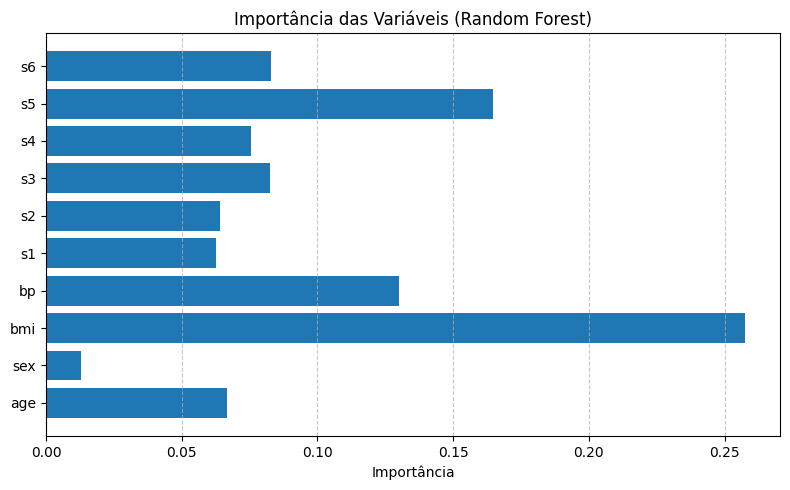

In [5]:
# --- 1. Carregar dados ---
data = load_diabetes()
X = data.data
y = data.target
p = X.shape[1]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --- 2. Ajustar uma Random Forest com m = sqrt(p) ---

m = int(np.sqrt(p))
rf = RandomForestRegressor(
    n_estimators=100,
    max_features=m,
    random_state=42
)
rf.fit(X_train, y_train)

# --- 3. Importância das variáveis ---
importances = rf.feature_importances_

# Usar nomes reais das features
feature_names = data.feature_names

plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances)
plt.xlabel("Importância")
plt.title("Importância das Variáveis (Random Forest)")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


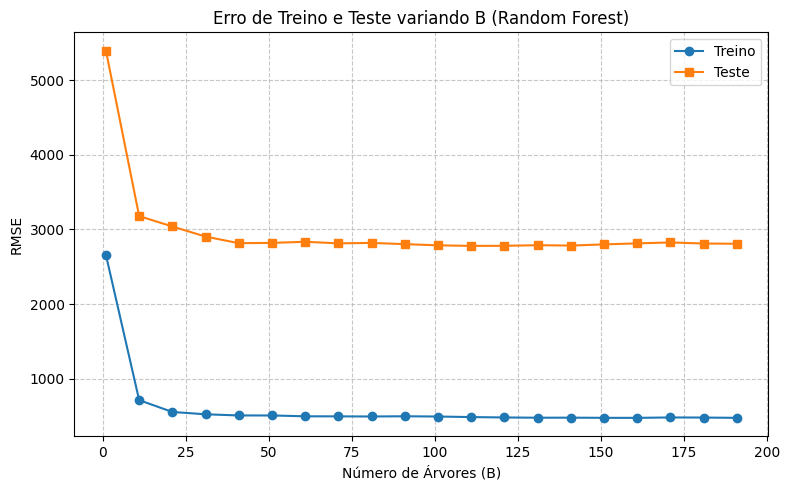

In [6]:
# --- 4. Erro de treino e teste variando B ---

B_values = np.arange(1, 201, 10)
train_errors = []
test_errors = []

for B in B_values:
    rf = RandomForestRegressor(
        n_estimators=B,
        max_features=m,
        random_state=42
    )
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    train_rmse = mean_squared_error(y_train, y_train_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_rmse)
    test_errors.append(test_rmse)

# --- 5. Plotar curva de erro ---

plt.figure(figsize=(8, 5))
plt.plot(B_values, train_errors, label="Treino", marker='o')
plt.plot(B_values, test_errors, label="Teste", marker='s')
plt.xlabel("Número de Árvores (B)")
plt.ylabel("RMSE")
plt.title("Erro de Treino e Teste variando B (Random Forest)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()